In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# Cabin,Name,Ticket drop
train_data_pre = train_data.drop(['Cabin','Name','Ticket'], axis =1)
test_data_pre = test_data.drop(['Cabin','Name','Ticket'], axis =1)

In [7]:
train_data_pre

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [8]:
train_data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [9]:
test_data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [10]:
train_data_pre.Age = train_data_pre.Age.fillna(train_data_pre.Age.median())
test_data_pre.Age = test_data_pre.Age.fillna(test_data_pre.Age.median())

In [11]:
train_data_pre = train_data_pre.dropna()
test_data_pre = test_data_pre.fillna(test_data_pre.Fare.mean())

In [12]:
train_data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [13]:
test_data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

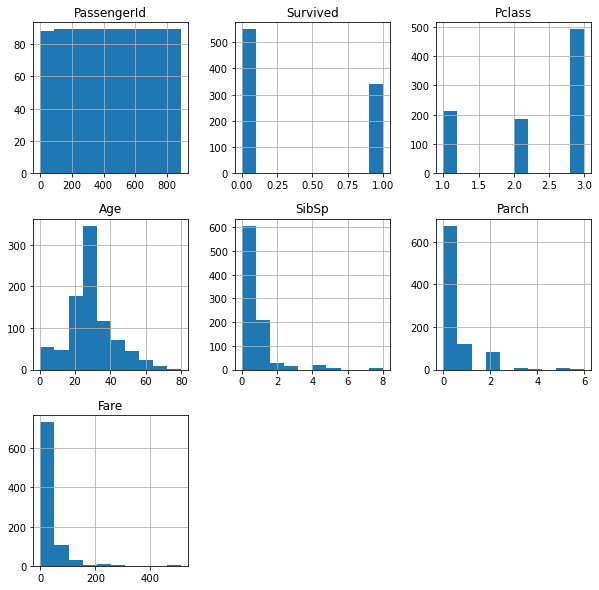

In [14]:
train_data_pre.hist(figsize=(10,10))

In [15]:
train_data_pre.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.031319,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
Age,0.031319,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.057686,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


In [16]:
train_data_pre.Age.max()

80.0

In [17]:
k=[]
def age(train):
    for i in train.Age:
        if i < 10:
            k.append('10대 미만')
        elif i<20:
            k.append('10대')
        elif i<30:
            k.append('20대')
        elif i<40:
            k.append('30대')
        elif i<50:
            k.append('40대')
        elif i<60:
            k.append('50대')
        else:
            k.append('60대 이상')
            
            

age(train_data_pre)

In [18]:
train_data_pre['Age_section'] = k

In [19]:
k=[]
age(test_data_pre)

In [20]:
test_data_pre['Age_section'] = k

In [21]:
train_data_pre.Age_section.sort_values()

192       10대
702       10대
700       10대
156       10대
689       10대
        ...  
570    60대 이상
252    60대 이상
545    60대 이상
33     60대 이상
694    60대 이상
Name: Age_section, Length: 889, dtype: object

In [22]:
train_data_pre.reset_index(drop=True, inplace=True)
test_data_pre.reset_index(drop=True, inplace=True)

In [23]:
train_beom = train_data_pre[['Sex','Embarked','Age_section']]
test_beom = test_data_pre[['Sex','Embarked','Age_section']]

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
ohe = OneHotEncoder()

In [26]:
ohe.fit(train_beom)

OneHotEncoder()

In [30]:
ohe.transform(train_beom).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [31]:
train_encoder = pd.DataFrame(ohe.transform(train_beom).toarray(), columns=['female','male','C','Q','S','10대','10대미만','20대','30대','40대','50대','60대이상'])

In [32]:
train_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   female  889 non-null    float64
 1   male    889 non-null    float64
 2   C       889 non-null    float64
 3   Q       889 non-null    float64
 4   S       889 non-null    float64
 5   10대     889 non-null    float64
 6   10대미만   889 non-null    float64
 7   20대     889 non-null    float64
 8   30대     889 non-null    float64
 9   40대     889 non-null    float64
 10  50대     889 non-null    float64
 11  60대이상   889 non-null    float64
dtypes: float64(12)
memory usage: 83.5 KB


In [33]:
train_data_com = pd.concat([train_data_pre, train_encoder], axis=1)

In [34]:
ohe.fit(test_beom)

OneHotEncoder()

In [35]:
ohe.transform(test_beom).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [36]:
test_encoder = pd.DataFrame(ohe.transform(test_beom).toarray(), columns=['female','male','C','Q','S','10대','10대미만','20대','30대','40대','50대','60대이상'])

In [37]:
test_data_com = pd.concat([test_data_pre, test_encoder], axis=1)

In [38]:
train_data_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   Age_section  889 non-null    object 
 10  female       889 non-null    float64
 11  male         889 non-null    float64
 12  C            889 non-null    float64
 13  Q            889 non-null    float64
 14  S            889 non-null    float64
 15  10대          889 non-null    float64
 16  10대미만        889 non-null    float64
 17  20대          889 non-null    float64
 18  30대          889 non-null    float64
 19  40대     

In [39]:
# encoding 후 삭제
train_data_com.drop(['Sex','Age','Age_section','Embarked'], axis=1, inplace=True)
test_data_com.drop(['Sex','Age','Age_section','Embarked'], axis=1, inplace=True)

In [40]:
X = train_data_com.drop(['PassengerId','Survived'], axis=1)
y = train_data_com.Survived

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('accuracy: ',accuracy_score(y_test, lr_pred))

accuracy:  0.8146067415730337


In [44]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)
print('accuracy: ',accuracy_score(y_test, ada_pred))

accuracy:  0.8314606741573034


In [45]:
gdb = GradientBoostingClassifier()
gdb.fit(X_train, y_train)
gdb_pred = gdb.predict(X_test)
print('accuracy: ',accuracy_score(y_test, gdb_pred))

accuracy:  0.848314606741573


In [46]:
test_data_com['Predict_Survive'] = gdb.predict(test_data_com.drop('PassengerId', axis=1))

In [47]:
test_data_com

,PassengerId,Pclass,SibSp,Parch,Fare,female,male,C,Q,S,10대,10대미만,20대,30대,40대,50대,60대이상,Predict_Survive
0,892,3,0,0,7.8292,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,893,3,1,0,7.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,894,2,0,0,9.6875,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,895,3,0,0,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,896,3,1,1,12.2875,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
414,1306,1,0,0,108.9000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
415,1307,3,0,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
416,1308,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [50]:
summary = test_data_com[['PassengerId','Predict_Survive']]

In [51]:
summary.columns = ['PassengerId','Survived']

In [52]:
summary

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [53]:
summary.to_csv('titanic.csv',index=False)